In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('car.csv')
#this function will provide the descriptive statistics of the dataset.(only int value)
dataset.describe()

,year,price,mileage
count,150.000000,150.000000,150.000000
mean,2008.726667,12961.933333,44260.646667
std,2.200966,3122.481735,26982.104322
min,2000.000000,3800.000000,4867.000000
25%,2008.000000,10995.000000,27200.250000
50%,2009.000000,13591.500000,36385.000000
75%,2010.000000,14904.500000,55124.500000
max,2012.000000,21992.000000,151479.000000


/Users/karthikeyanthanigai/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


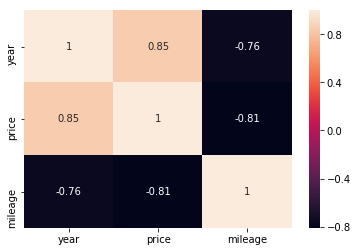

In [3]:
import seaborn as sns
#Other methods like Back Propagation/ Forward Propagation can be used. But Correlation Matrix is best for most speedy analysis.
correlation_matrix = dataset.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)



In [4]:
#determine X and y variables(for correlation matrix this values is taken as independent variables)
X = dataset.iloc[:, [0,1,3,5]].values
y = dataset.iloc[:, [2]].values

In [5]:
#label encoding for character data
from sklearn.preprocessing import LabelEncoder
labelencoder1 = LabelEncoder()
X[:, 1] = labelencoder1.fit_transform(X[:, 1])
labelencoder2 = LabelEncoder()
X[:, -1] = labelencoder2.fit_transform(X[:, -1])


In [6]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)



/Users/karthikeyanthanigai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/karthikeyanthanigai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
#split
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [8]:
#ols
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

#predicting the value
y_pred1= lin_reg.predict(X_test)


/Users/karthikeyanthanigai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [9]:
#r2_score result
from sklearn.metrics import r2_score, mean_squared_error
r_squared1 = r2_score(y_test, y_pred1)
print("Coefficient of Determination using ols method = ",r_squared1)


Coefficient of Determination using ols method =  0.7257817833694611


In [10]:
#SGD
from sklearn.linear_model import SGDRegressor, LinearRegression
regressor = SGDRegressor(max_iter=10000, tol=1e-3)
regressor.fit(X_train, y_train)

#predicting the value
y_pred = regressor.predict(X_test)


/Users/karthikeyanthanigai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
#r2_score result
from sklearn.metrics import r2_score, mean_squared_error
r_squared = r2_score(y_test, y_pred)
print("Coefficient of Determination using sgd method = ",r_squared)


Coefficient of Determination using sgd method =  0.7265090150336959
